In [1]:
from functools import partial #Funciones de orden superior
from collections import defaultdict #Llama a una función de fábrica para suministrar valores perdidos
import numpy as np
import matplotlib.pyplot as plt # Ploteo
import scipy.integrate #Librería de integración
import sympy 
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #Leyendas personalizadas
%matplotlib inline

In [2]:
scenarios = [{'S1':0.3375, 'S2':0.788, 'S3':1, 'S4':0.65, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5},
             {'S1':0.32, 'S2':0.915, 'S3':1, 'S4':0.7, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5}]

# Tiempo de integración para las trayectorias
time = np.linspace(0,1000, 9000)

#Declaramos distintas condiciones iniciales:
#initial_conditions = [(0,0),(3,4),(6,5),(7.8,9),(9,7.8),(13,11),(15,18),(20,20)]
#initial_conditions = [(0,0),(1,1),(1.5,1.5),(1.7,1.8),(2.1,2.1),(2.7,2.7),(3.1,3.1),(3,3.5),(4,4),(4.25,4.25)]
initial_conditions = [(0.3,2),(1,2.3),(1.5,2.5),(1.55,4),(1.7,4.1),(1.8,3.8),(2.1,4),(2.5,4.5),(2.7,3),(3.1,4.1),(3,3.5),(3.5,4.6)]

In [3]:
def Cloutier(y, t, S1, S2, S3, S4, K1, K2, K3, K4, daSYN, kaSYN):
    """ Definimos el modelo de Cloutier
    Argumentos:
        y (array): (concentraciónn de ROS, concentración de aSYNmis)
        t (float): tiempo 
        S1(float): Estrés oxidativo interno y externo
        S2(float): Mecanismo antioxidativo
        S3(float): Daños y mutaciones genéticas
        S4(float): Degradación de proteínas
    Regresa: dy/dt
    """
    ROS, aSYNmis = y
    return np.array([(K1*(1+S1+daSYN*((aSYNmis/kaSYN)**4)/(1+(aSYNmis/kaSYN)**4))-K2*ROS*S2),
                     K3*ROS*S3-K4*aSYNmis*S4])

In [4]:
# Simulamos las trayectorias para ROS y aSYNmis del modelo de Cloutier
trajectory = {}
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        trajectory[i,j] = scipy.integrate.odeint(partial(Cloutier, **param),
                                                 y0=ic,
                                                 t=time)
        

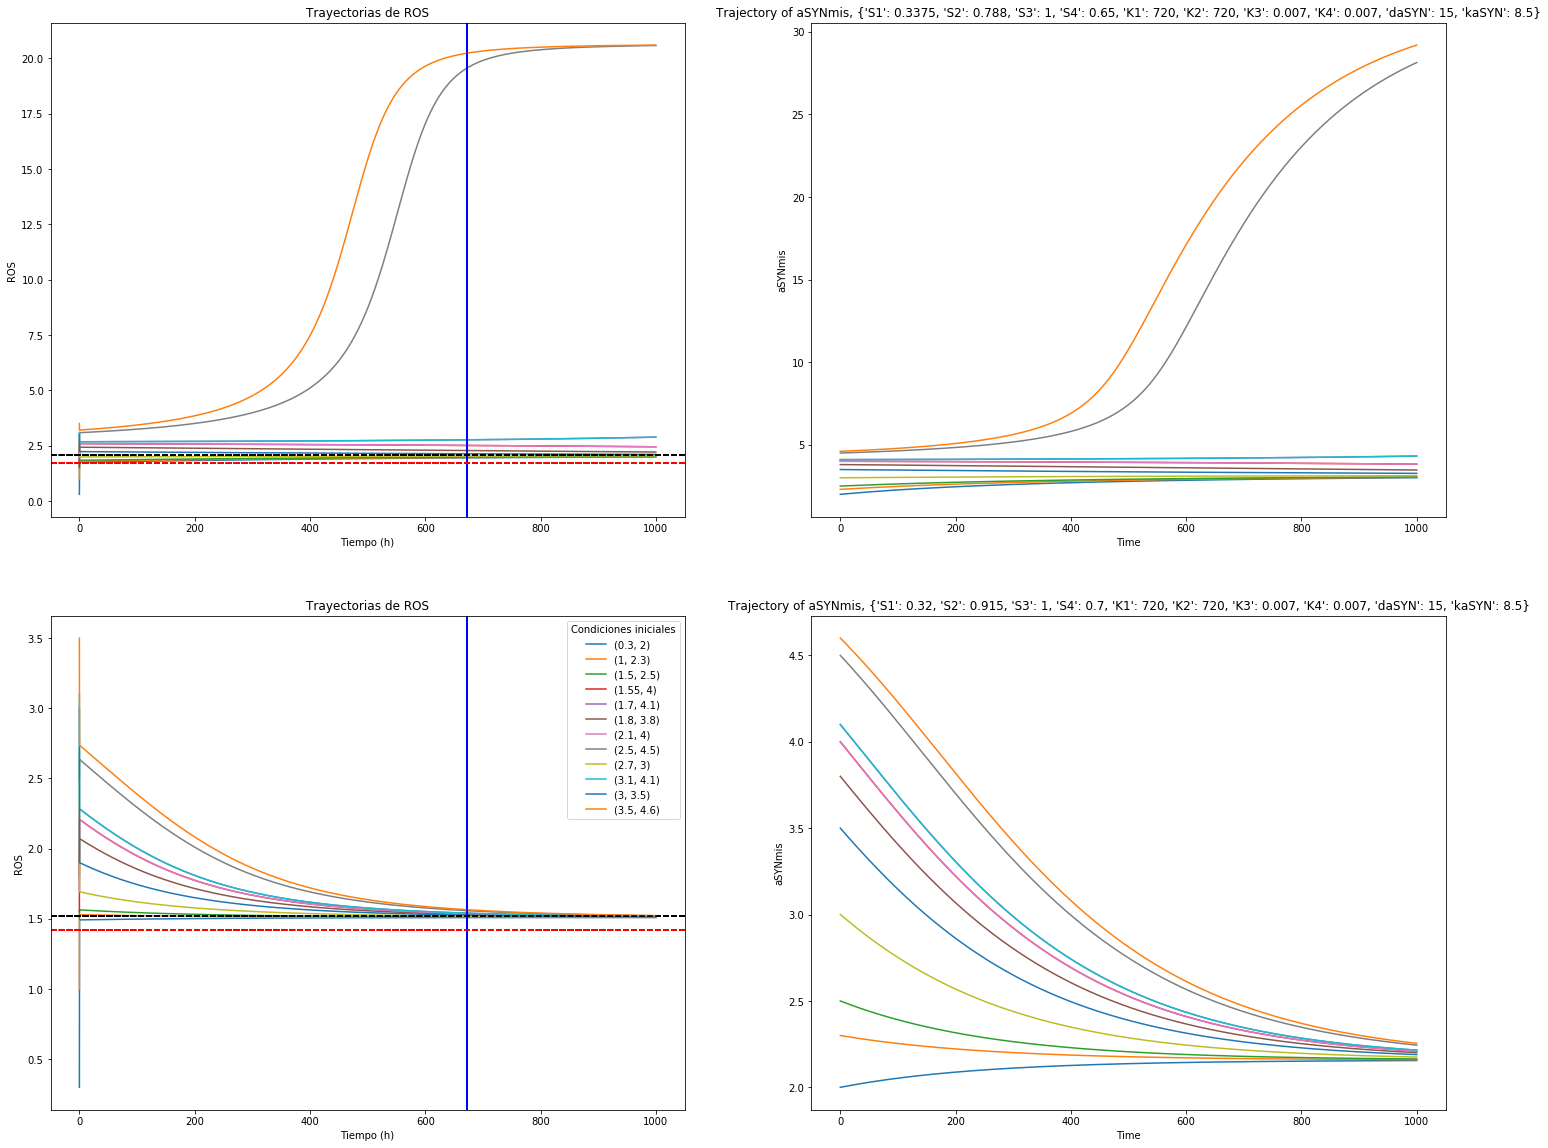

In [6]:
# Dibujamos las trayectorias simuladas de arriba 
fig,ax = plt.subplots(2,2,figsize=(25,20))
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        ax[i][0].set(xlabel='Tiempo (h)', ylabel='ROS', title='Trayectorias de ROS')
        ax[i][1].set(xlabel='Time', ylabel='aSYNmis', title='Trajectory of aSYNmis, {}'.format(param))
        l = ax[i][0].plot(time,trajectory[i,j][:,0], label=ic)
        ax[i][1].plot(time,trajectory[i,j][:,1], color=l[0].get_color())
        ax[i][0].axvline(x=672, color = "blue")
        ax[0][0].axhline(y=2.054412, color = "black", linestyle = "dashed")
        ax[0][0].axhline(y=1.731017, color = "red", linestyle = "dashed")
        ax[1][0].axhline(y=1.517080, color = "black", linestyle = "dashed")
        ax[1][0].axhline(y=1.423125, color = "red", linestyle = "dashed")
ax[i][0].legend(title='Condiciones iniciales')

In [71]:
#Error  A53T
2.054412-1.731017

0.3233950000000001

In [72]:
#Error Tripl
1.517080-1.423125

0.09395500000000001